In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Download dataset
mnist = tf.keras.datasets.mnist

#load
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#normalize
x_train, x_test = x_train/ 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
# Define, train and evalue a linear model

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)), # images are 28 x 28 in size
                                    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 5)
model.evaluate(x_test,y_test)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4702 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3038 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2838 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2734 - accuracy: 0.9235
Epoch 5/5
313/313 [==============================] - 0s 949us/step - loss: 0.2656 - accuracy: 0.9257


[0.26558056473731995, 0.9257000088691711]

In [5]:
# 1A Plot loss and accuracy

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# TODO Create a history object to store the results of model.fit

history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs =10)


Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4703 - accuracy: 0.8759 - val_loss: 0.3049 - val_accuracy: 0.9155
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3036 - accuracy: 0.9150 - val_loss: 0.2847 - val_accuracy: 0.9197
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2832 - accuracy: 0.9204 - val_loss: 0.2749 - val_accuracy: 0.9251
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2735 - accuracy: 0.9238 - val_loss: 0.2695 - val_accuracy: 0.9242
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2671 - accuracy: 0.9251 - val_loss: 0.2642 - val_accuracy: 0.9257
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2618 - accuracy: 0.9276 - val_loss: 0.2671 - val_accuracy: 0.9242
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2582 - accuracy: 0.9282 - val_loss: 0.2623 - val_accuracy:

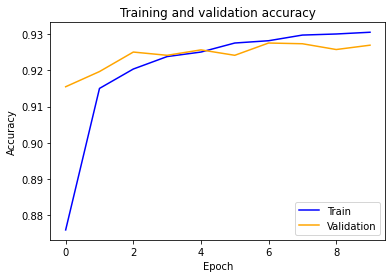

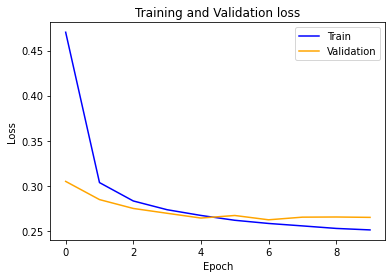

In [7]:
# plot history
def plot(history):

  # The history object contains results on the training and validation sets for each epoch
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Get number of epochs
  epochs = range(len(acc))

  plt.title('Training and validation accuracy')
  plt.plot(epochs, acc, color='blue', label='Train')
  plt.plot(epochs, val_acc, color='orange', label='Validation')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()


  _= plt.figure()
  plt.title('Training and Validation loss')
  plt.plot(epochs, loss, color='blue', label='Train')
  plt.plot(epochs, val_loss, color='orange', label="Validation")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()


plot(history)


In [8]:
#1B Implement NN

# Single hidden layer
# Add a dense layer with 128 units and Relu Activation
# Train and evaluate
# How does the accuracy compare to the linear model above?

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2508 - accuracy: 0.9290 - val_loss: 0.1355 - val_accuracy: 0.9603
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1120 - accuracy: 0.9660 - val_loss: 0.0920 - val_accuracy: 0.9709
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0779 - accuracy: 0.9764 - val_loss: 0.0862 - val_accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0587 - accuracy: 0.9820 - val_loss: 0.0774 - val_accuracy: 0.9760
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0456 - accuracy: 0.9864 - val_loss: 0.0848 - val_accuracy: 0.9741
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0366 - accuracy: 0.9883 - val_loss: 0.0746 - val_accuracy: 0.9767
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0283 - accuracy: 0.9915 - val_loss: 0.0847 - val_accuracy:

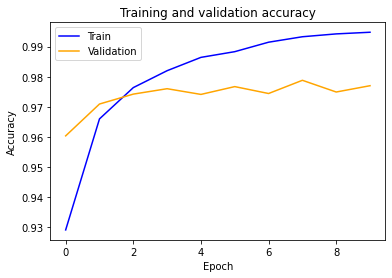

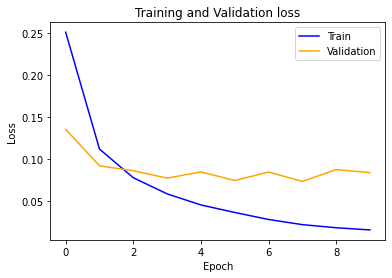

In [9]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

neural_history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs =10)
plot(neural_history)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2361 - accuracy: 0.9274 - val_loss: 0.1176 - val_accuracy: 0.9659
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1044 - accuracy: 0.9675 - val_loss: 0.0926 - val_accuracy: 0.9726
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0758 - accuracy: 0.9765 - val_loss: 0.0952 - val_accuracy: 0.9725
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0631 - accuracy: 0.9809 - val_loss: 0.0845 - val_accuracy: 0.9761
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0508 - accuracy: 0.9840 - val_loss: 0.0776 - val_accuracy: 0.9779
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0431 - accuracy: 0.9867 - val_loss: 0.0857 - val_accuracy: 0.9781
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0376 - accuracy: 0.9878 - val_loss: 0.0831 - val_accuracy:

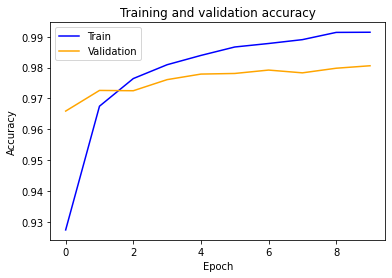

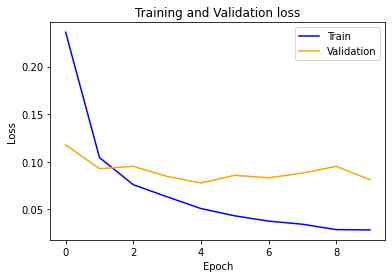

In [10]:
#1C Implement a deep NN
# Modify the code below to create and train a deep neural network with at least two hidden layers

model = tf.keras.models.Sequential([
                                     tf.keras.layers.Flatten(input_shape=(28,28)),
                                     tf.keras.layers.Dense(128,activation='relu'),
                                     tf.keras.layers.Dense(128,activation='relu'),
                                    #  tf.keras.layers.Dropout(rate=.5),
                                     tf.keras.layers.Dense(128, activation='relu'),
                                     tf.keras.layers.Dense(128, activation='relu'),
                                     tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
deep_history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=10)
plot(deep_history)

In [11]:
# 1D make predictions on the entire test set using model.predict
# identify one image classified correctly, and one image classified incorrectly
# Display the images, correct labels, predicted labels, and confidence scores

In [12]:
predictions = model.predict(x_test)

In [13]:
# Check the first ten predicted labels and true labels to find examples of correct and incorrect predictions

# Create lists for all correct and incorrect positions
correct_prediction_indicies = []
incorrect_prediction_indicies = []

for i in range(len(predictions)):
  if (tf.math.argmax(predictions[i]) == y_test[i]): # Prediction is correct
    correct_prediction_indicies.append(i)
  else:
    incorrect_prediction_indicies.append(i)
    

In [14]:
print(f'The first correct prediction occurs at index={correct_prediction_indicies[0]}')
print(f'The first incorrect prediction occurs at index={incorrect_prediction_indicies[0]}')

The first correct prediction occurs at index=0
The first incorrect prediction occurs at index=195


In [15]:
# So we can assign variables to avoid typing the full list for clarity
first_correct_pred_index = correct_prediction_indicies[0]
first_incorrect_pred_index = incorrect_prediction_indicies[0]


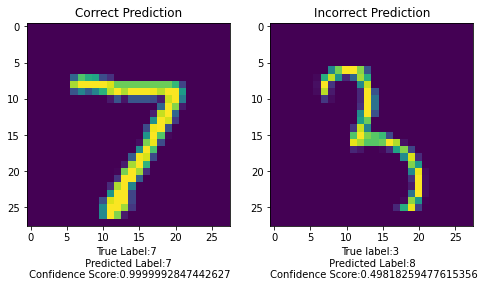

In [16]:
# Unclear about confidence score

fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,4)

ax[0].set_title("Correct Prediction")
ax[0].set_xlabel(f'True Label:{y_test[first_correct_pred_index]} \n Predicted Label:{np.argmax(predictions[first_correct_pred_index])} \n Confidence Score:{np.max(predictions[first_correct_pred_index])}')

ax[1].set_title("Incorrect Prediction")
ax[1].set_xlabel(f'True label:{y_test[first_incorrect_pred_index]} \n Predicted Label:{np.argmax(predictions[first_incorrect_pred_index])} \n Confidence Score:{np.max(predictions[first_incorrect_pred_index])}')

ax[0].imshow(x_test[first_correct_pred_index])
ax[1].imshow(x_test[first_incorrect_pred_index])





In [17]:
#Part 2 Subclassed Models
# Instead of using the built in model.fit methods, we will train models using GradientTape and the Keras Subclassing API


In [18]:
#download and prepare our dataset
# We also are going to use tf.data to batch and shuffle the data. 

# Load Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Batch and shuffle the data
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train.astype('float32') / 255, y_train)).shuffle(1024).batch(32)

test_ds= tf.data.Dataset.from_tensor_slices(
    (x_test.astype('float32') / 255, y_test)).batch(32)
    

tf.Tensor(4, shape=(), dtype=uint8)


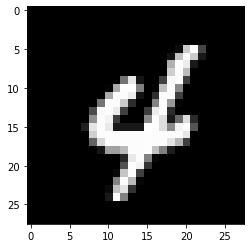

In [19]:
# Example of iterating over a dataset object
for image, label in train_ds.take(1):
  plt.imshow(image[0],plt.get_cmap('gray'))
  print(label[0])

In [20]:
class MyLinearModel(Model):
  def __init__(self):
    super(MyLinearModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10, activation='softmax', name="dense1")

  def call(self, x):
    x = self.flatten(x)
    return self.d1(x)

In [21]:
model = MyLinearModel()

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.SGD()

# For each epoch
for epoch in range(5):

  # For each batch of images and labels
  for images, labels in train_ds:

    # Open a GradientTape.
    with tf.GradientTape() as tape:

      # Forward pass
      predictions = model(images)

      # Calculate loss
      loss = loss_fn(labels, predictions)

    # Backprop to calculate gradients
    gradients = tape.gradient(loss, model.trainable_variables)

    # Gradient descent step
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  # Calculate loss on the test data
  test_loss = []
  for images, labels in test_ds: 
    predictions = model(images)
    loss_on_batch = loss_fn(labels, predictions)
    test_loss.append(loss_on_batch)
    
  print("Epoch {}, Test loss: {}".format(epoch, tf.reduce_mean(test_loss)))

Epoch 0, Test loss: 0.4821569323539734
Epoch 1, Test loss: 0.4013344347476959
Epoch 2, Test loss: 0.36852917075157166
Epoch 3, Test loss: 0.3496668338775635
Epoch 4, Test loss: 0.33730801939964294


In [27]:
# There are two ways to retrieve the weights. You can use the public API
# (model.get_layer(name).get_weights()), or, you can access the dense layer 
# directly (model.dl) then find the accessor method, or again, access the
# variable directly.
# Python tip: try ```dir(model.d1)```

# TODO: modify this code to get the weights
weights, bias = model.get_layer('dense1').get_weights()
print(weights.shape)

(784, 10)


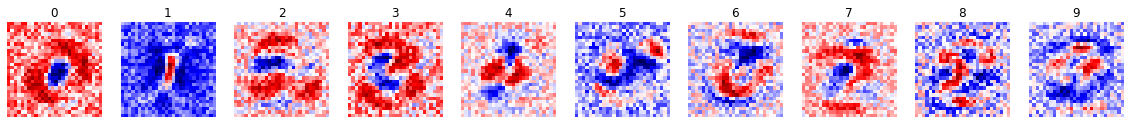

In [47]:
fig, axs = plt.subplots(1,10, figsize=(20,20))
for i in range(10):
  subplot = axs[i]
  subplot.set_title(i)
  subplot.axis('off')
  # TODO: modify this code to complete the plotting function
  i_weights = weights[:,i]
  img = i_weights.reshape(28,28) # Reshape the weights into a 28x28 array
  subplot.imshow(img, plt.get_cmap('seismic'))
plt.show()

In [32]:
type(weights)

numpy.ndarray

array([ 6.34257272e-02,  7.24091306e-02, -2.09897533e-02, -2.24593952e-02,
        7.72832707e-02,  8.29140469e-02, -6.37141019e-02, -8.08396861e-02,
        6.42097816e-02, -3.65100354e-02,  1.81147084e-02,  3.33636999e-03,
        6.50636107e-02, -7.03505352e-02, -6.57208590e-03, -6.13439269e-02,
       -8.10097605e-02, -3.07435542e-02,  5.99053130e-02,  5.05994037e-02,
        3.45570073e-02,  1.74347833e-02, -3.68592627e-02, -7.26260990e-02,
       -7.29548931e-03, -4.39263545e-02,  1.92693472e-02,  4.96539399e-02,
        6.49162009e-02,  2.28384882e-02,  3.78631204e-02,  4.73584607e-02,
        5.19278795e-02,  3.54596451e-02, -4.29846160e-02, -5.43803871e-02,
       -1.60597416e-03,  5.34267500e-02, -5.21435812e-02,  3.57323475e-02,
       -5.29293902e-02,  5.30447252e-02,  2.63839611e-03, -4.22995947e-02,
        3.97006869e-02, -3.37942690e-02, -2.37390455e-02,  5.62970452e-02,
        1.14600034e-02,  6.58279955e-02, -7.16527477e-02,  8.20999071e-02,
        9.57438350e-03, -